In [1]:
from tools_functions import *
import pickle 
import matplotlib.pyplot as plt
import datetime as dt
import sys
sys.path.insert(0,'/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/')
from weigh_predictor import *

In [2]:
alldates = find_dates_between('2017-06-12', dt.datetime.now().strftime('%Y-%m-%d'))
print(len(alldates))
alldates[258]

2712


'2018-02-25'

In [18]:
log = pickle.load(open('firepoint/firemen/occurence/bin/2x2/departement-01-ainbinScale0.pkl', 'rb'))
regions = gpd.read_file('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/regions/regions.geojson')
reg = regions[regions['departement'] == 'departement-69-rhone']

DriverError: /home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/regions/regions.geojson: No such file or directory

In [19]:
log2 = pickle.load(open('firepoint/Ain/occurence/bin/2x2/departement-01-ainbinScale0.pkl', 'rb'))
regions = gpd.read_file('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/regions/regions.geojson')
reg = regions[regions['departement'] == 'departement-69-rhone']

DriverError: /home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/regions/regions.geojson: No such file or directory

(<matplotlib.image.AxesImage at 0x7cda9a563880>, array([ 0., nan]))

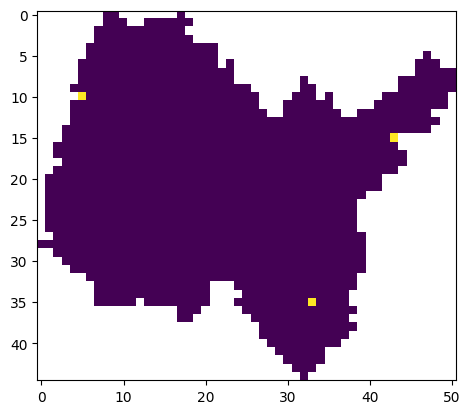

In [20]:
plt.imshow(log[:, :, 2248]), np.unique(log[:, :, 0])

In [17]:
np.unique(log[~np.isnan(log)] == log2[~np.isnan(log2)])

array([ True])

(<matplotlib.image.AxesImage at 0x7cda997f7ca0>, array([ 0., nan]))

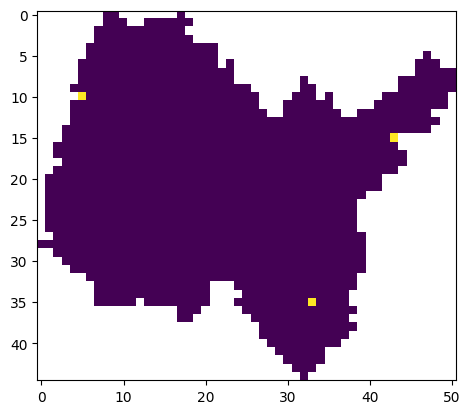

In [21]:
plt.imshow(log2[:, :, 2248]), np.unique(log2[:, :, 0])

In [14]:
import numpy as np
log[np.isnan(log)] = 0
log2[np.isnan(log2)] = 0
log = np.round(log, 1)
log2 = np.round(log2, 1)
np.unique(log[~np.isnan(log)] == log2[~np.isnan(log2)])
np.argwhere(log != log2), np.argwhere(log != log2).shape

(array([], shape=(0, 3), dtype=int64), (0, 3))

In [10]:
np.unique(log)

array([0.0000000e+00, 1.1485929e-17, 1.9017273e-17, ..., 1.0000000e+00,
       1.0000000e+00,           nan])

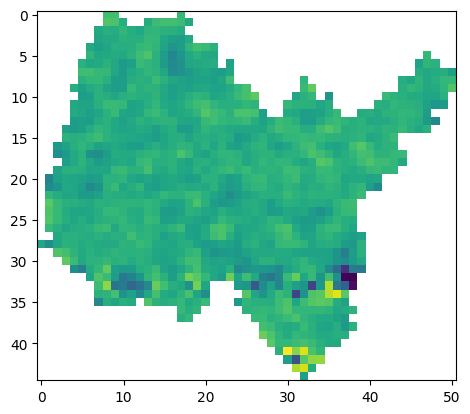

In [13]:
plt.imshow(log[:, :, 500])

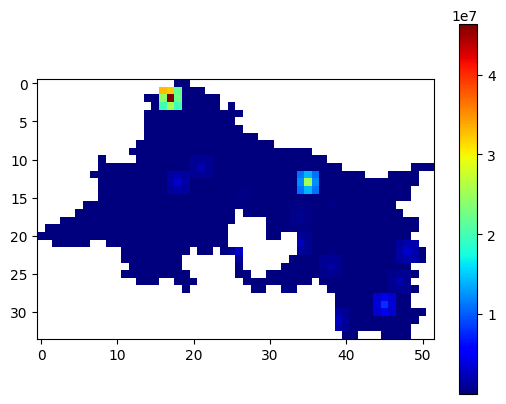

In [17]:
valuesSum = np.nansum(log, axis=2)
valuesSum[np.isnan(log[:,:,0])] = np.nan
plt.imshow(valuesSum, cmap='jet')
plt.colorbar()

In [37]:
np.argwhere(~np.isnan(log[0])).shape

(503, 2)

In [38]:
np.unique(log)

array([2450., 2451., 2452., 2453., 2454., 2455., 2456., 2457., 2461.,
       2462., 2463., 2464., 2465., 2466., 2467., 2468., 2469., 2471.,
       2472., 2473., 2474., 2475., 2476., 2477., 2479., 2480., 2482.,
       2483., 2485., 2486., 2487., 2488., 2489., 2490., 2491., 2492.,
       2494., 2496., 2497., 2498., 2499., 2500., 2501., 2502., 2503.,
       2504., 2506., 2507., 2508., 2509., 2510., 2511., 2512., 2514.,
       2515., 2516., 2517., 2518., 2519., 2520., 2521., 2524., 2525.,
       2526., 2527., 2529., 2530., 2531., 2532., 2533., 2534., 2535.,
       2536., 2537., 2538., 2540., 2541., 2542., 2543., 2544., 2545.,
       2546., 2547., 2549., 2550., 2551., 2552., 2553., 2554., 2555.,
       2556., 2557., 2558., 2559., 2561., 2562., 2563., 2564., 2565.,
       2566., 2567., 2568., 2569., 2570., 2571., 2572., 2573., 2574.,
       2575., 2576., 2577., 2578., 2579., 2580., 2581., 2582., 2583.,
       2585., 2586., 2587., 2588., 2589., 2590., 2591., 2592., 2593.,
       2594., 2595.,

/home/caron/Bureau/.conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


66 503


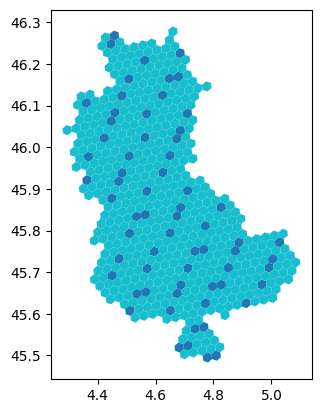

In [39]:
values = reg.scale0.values
nofound = values[~np.isin(values, log)]
reg['isFound'] = True
reg.loc[reg[reg['scale0'].isin(nofound)].index, 'isFound'] = False
reg.plot(column='isFound')
print(len(reg[~reg['isFound']]), len(reg[reg['isFound']]))

[]


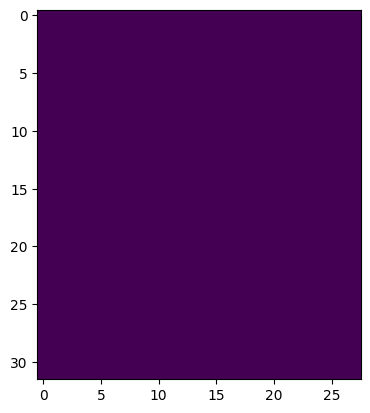

In [12]:
cls = np.unique(log)
toMany = []
sh = []
for c in cls:
    mask = np.argwhere(log == c)
    if mask.shape[0] > 1:
        toMany.append(c)
        sh.append(mask.shape[0])
toMany = np.asarray(toMany)
print(np.unique(sh))
plt.imshow(np.isin(log, toMany)[0])

(45, 51, 2574)


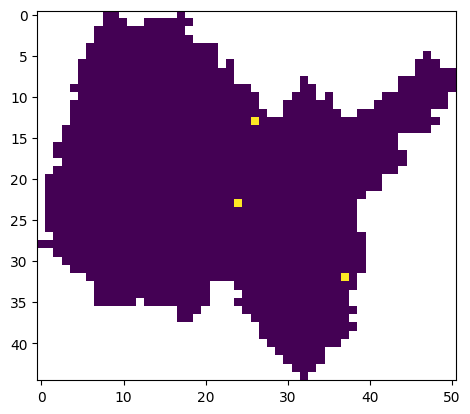

In [6]:
log = pickle.load(open('firepoint/firemen/occurence/bin/2x2/departement-01-ainbinScale0.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,260])

(45, 51, 2574)


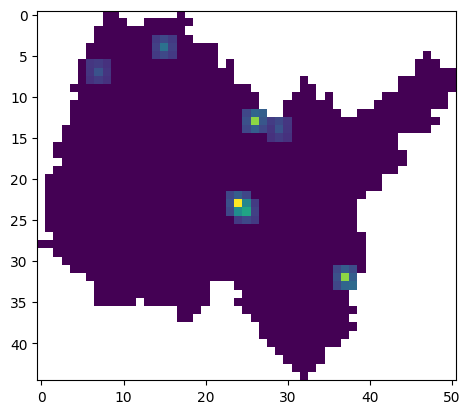

In [7]:
log = pickle.load(open('firepoint/firemen/occurence/log/2x2/departement-01-ainpastInfluence.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,260])

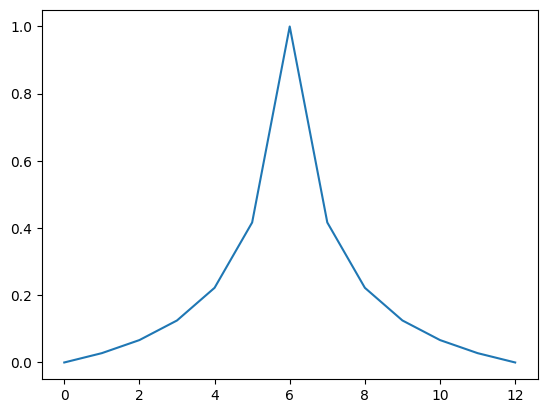

In [3]:
kernel_size = 11 + 2
kernel = np.abs(np.arange(-(kernel_size//2), kernel_size // 2 + 1))
kernel += 1
kernel = 1 / kernel
kernel = MinMaxScaler((0, 1)).fit_transform(kernel.reshape(-1,1))
plt.plot(kernel)

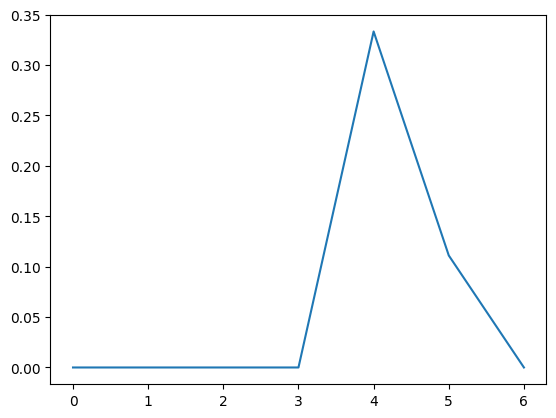

In [88]:
past_kernel_size = 7
kernel_daily_past = np.abs(np.arange(-(past_kernel_size//2), past_kernel_size // 2 + 1))
kernel_daily_past += 1
kernel_daily_past = 1 / kernel_daily_past
kernel_season_past = np.ones(past_kernel_size, dtype=float)
kernel_season_past /= kernel_size  # Normalize the kernel
kernel_daily_past = MinMaxScaler((0, 1)).fit_transform(kernel_daily_past.reshape(-1,1))
kernel_daily_past[:past_kernel_size // 2 + 1] = 0.0
kernel_season_past[:past_kernel_size // 2 + 1] = 0.0
plt.plot(kernel_daily_past)

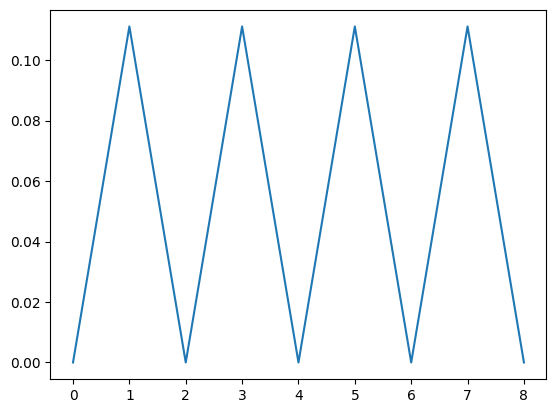

In [7]:
me = np.full(9, 1/9, dtype=float)

me[0] = 0
me[2] = 0
me[4] = 0
me[0] = 0
me[6] = 0
me[8] = 0

plt.plot(me)

In [76]:
kernel_size = 17
kernel_daily = np.abs(np.arange(-(kernel_size//2), kernel_size // 2 + 1))
kernel_daily += 1
kernel_daily = 1 / kernel_daily
# Create the seasonal kernel
kernel_season = np.ones(kernel_size, dtype=float)
kernel_season /= kernel_size  # Normalize the kernel

# Zero out future values in the kernel if only past data is considered

kernel_daily_past = np.copy(kernel_daily)
kernel_season_past = np.copy(kernel_season)
kernel_daily_past[:kernel_size // 2 + 1] = 0.0
kernel_season_past[:kernel_size // 2 + 1] = 0.0

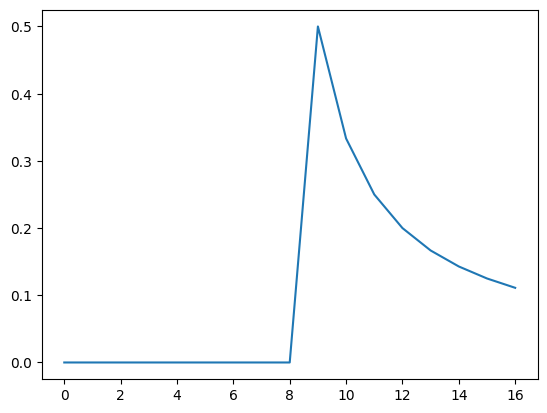

In [77]:
plt.plot(kernel_daily_past)

1.0
(3, 3, 11)


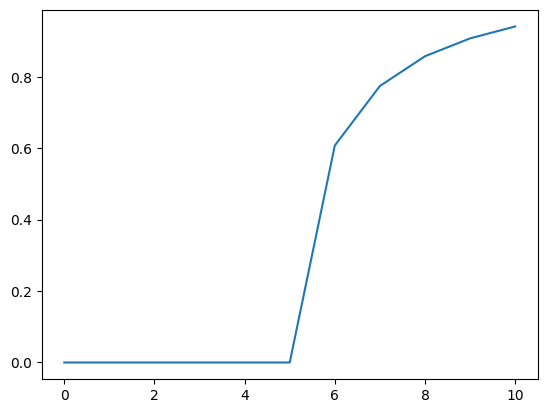

In [71]:
from tools_functions import *
dim = (3,3,11)
n_pixel_x = 0.02875215641173088
n_pixel_y = 0.020721094073767096

resolution_altitude = np.linspace((11//2) + 1, 0, num=(dim[-1] // 2) + 1)[0] - np.linspace((11//2) + 1, 0, num=(dim[-1] // 2) + 1)[1]
kernel = myFunctionDistanceDugrandCercle3D(dim, resolution_lon=n_pixel_x, resolution_lat=n_pixel_y, resolution_altitude=resolution_altitude) + resolution_altitude

kernel = resolution_altitude / kernel
kernel = (np.max(kernel) - kernel) + np.min(kernel)
#kernel = np.flip(kernel, axis=0)
print(np.max(kernel))
#kernel = kernel / np.max(kernel)
kernel[:,:,:(dim[2]//2) + 1] = 0.0
print(kernel.shape)
plt.plot(kernel[1,1])

In [20]:
print(kernel[:, :, 2])

[[0.43222453 0.56560227 0.43222453]
 [0.48409788 1.         0.48409788]
 [0.43222453 0.56560227 0.43222453]]


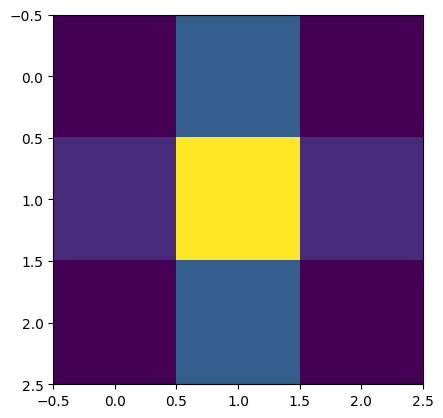

In [21]:
plt.imshow(kernel[:, :, 1])

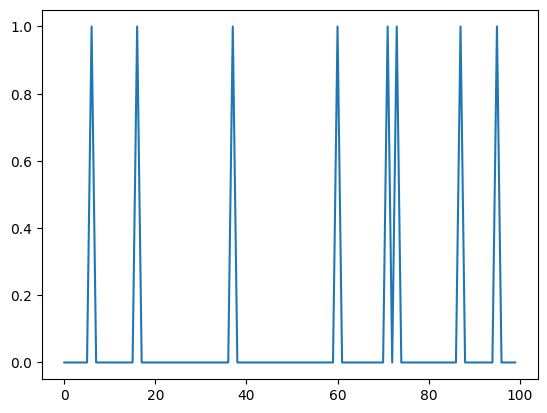

In [62]:
import random
np.random.seed(42)
random.seed(42)
test = np.zeros(100)
test[np.round(np.random.rand(10) * 100).astype(int)] = 1
plt.plot(test)

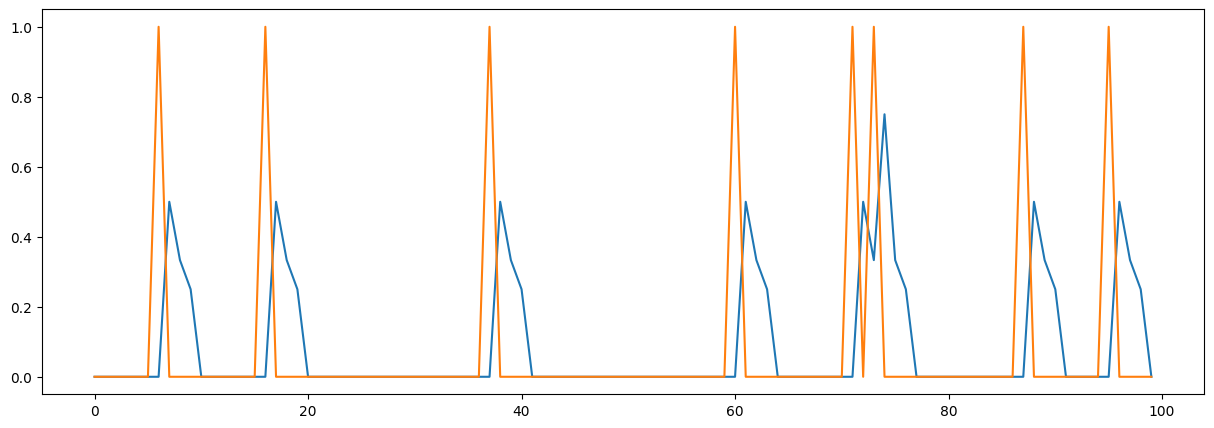

In [75]:
from astropy.convolution import convolve, convolve_fft
res = convolve_fft(test, kernel_daily_past.reshape(-1), normalize_kernel=False, mask=None)
plt.figure(figsize=(15,5))
plt.plot(res)
plt.plot(test)

(38, 28, 2574)


Text(0.5, 1.0, '2018-02-26')

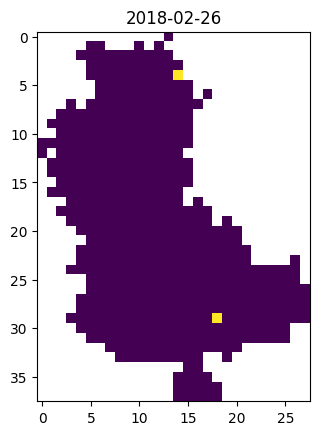

In [33]:
log = pickle.load(open('firepoint/bin/2x2/departement-69-rhonebinScale0.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
plt.title(str(alldates[259]), loc='center')

(38, 28, 2574)


Text(0.5, 1.0, '2018-02-26')

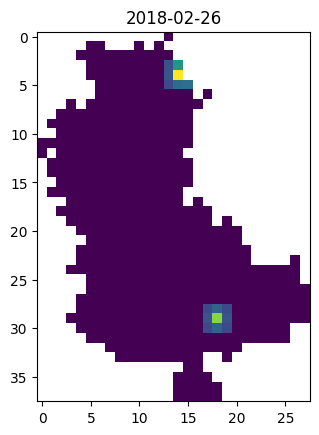

In [39]:
log = pickle.load(open('firepoint/log/2x2/departement-69-rhoneInfluence.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
plt.title(str(alldates[259]), loc='center')

(38, 28, 2574)


Text(0.5, 1.0, '2018-02-26')

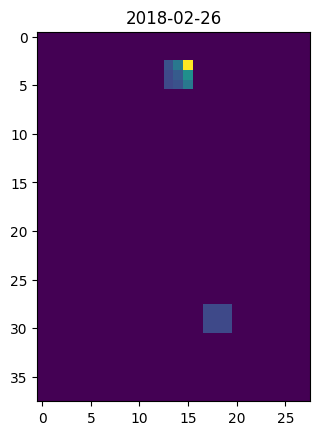

In [35]:
log = pickle.load(open('firepoint/log/2x2/departement-69-rhoneSeason.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
plt.title(str(alldates[259]), loc='center')

(38, 28, 2574)
[0.         0.14285714 0.28571429 0.42857143        nan]


Text(0.5, 1.0, '2018-02-26')

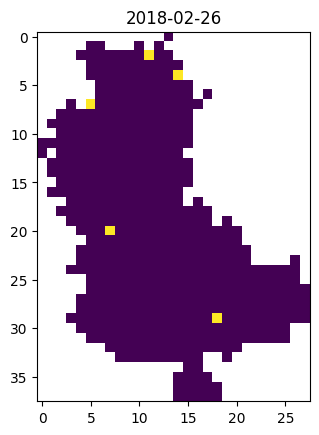

In [26]:
log = pickle.load(open('firepoint/log/2x2/departement-69-rhoneHistorical.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
print(np.unique(log))
plt.title(str(alldates[259]), loc='center')

(38, 28, 2574)


Text(0.5, 1.0, '2018-02-26')

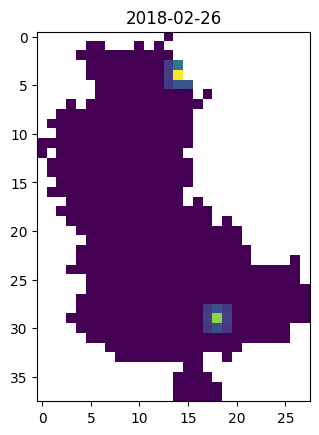

In [23]:
log = pickle.load(open('firepoint/log/2x2/departement-69-rhoneDaily.pkl', 'rb'))
print(log.shape)
plt.imshow(log[:,:,259])
plt.title(str(alldates[259]), loc='center')

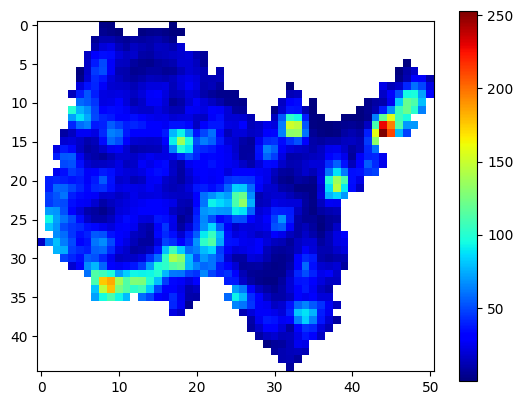

In [5]:
sinister = 'firepoint'
departement = 'departement-01-ain'
mask = read_object(departement+'rasterScale0.pkl', Path(sinister + '/raster/2x2'))
values = read_object(departement+'Influence.pkl', Path(sinister + '/log/2x2'))
binValues = read_object(departement+'binScale0.pkl', Path(sinister + '/bin/2x2'))

valuesSum = np.nansum(values, axis=2)
valuesSum[np.isnan(values[:,:,0])] = np.nan
plt.imshow(valuesSum, cmap='jet')
plt.colorbar()

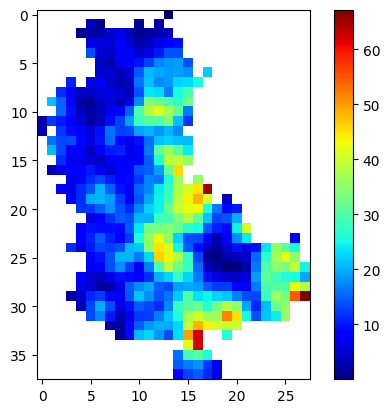

In [2]:
sinister = 'firepoint'
departement = 'departement-69-rhone'
mask = read_object(departement+'rasterScale0.pkl', Path(sinister + '/raster/2x2'))
values = read_object(departement+'Influence.pkl', Path(sinister + '/log/2x2'))
binValues = read_object(departement+'binScale0.pkl', Path(sinister + '/bin/2x2'))

valuesSum = np.nansum(values, axis=2)
valuesSum[np.isnan(values[:,:,0])] = np.nan
plt.imshow(valuesSum, cmap='jet')
plt.colorbar()

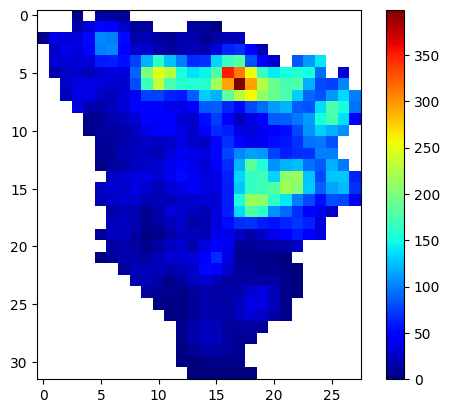

In [3]:
sinister = 'firepoint'
departement = 'departement-78-yvelines'
mask = read_object(departement+'rasterScale0.pkl', Path(sinister + '/raster/2x2'))
values = read_object(departement+'Influence.pkl', Path(sinister + '/log/2x2'))
binValues = read_object(departement+'binScale0.pkl', Path(sinister + '/bin/2x2'))

valuesSum = np.nansum(values, axis=2)
valuesSum[np.isnan(values[:,:,0])] = np.nan
plt.imshow(valuesSum, cmap='jet')
plt.colorbar()

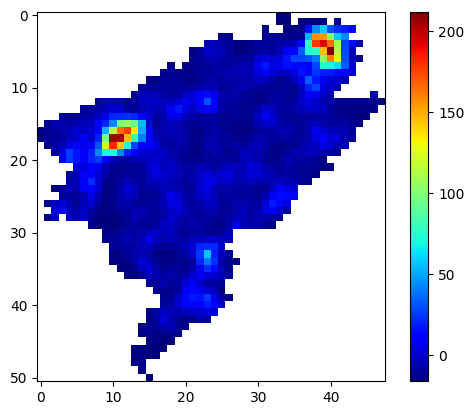

In [25]:
sinister = 'firepoint'
departement = 'departement-25-doubs'
mask = read_object(departement+'rasterScale0.pkl', Path(sinister + '/raster/2x2'))
values = read_object(departement+'Influence.pkl', Path(sinister + '/log/2x2'))
binValues = read_object(departement+'binScale0.pkl', Path(sinister + '/bin/2x2'))

valuesSum = np.nansum(values, axis=2)
valuesSum[np.isnan(values[:,:,0])] = np.nan
plt.imshow(valuesSum, cmap='jet')
plt.colorbar()

In [79]:
def order_class(predictor, pred):
    res = np.zeros(pred[~np.isnan(pred)].shape[0], dtype=int)
    cc = predictor.cluster_centers.reshape(-1)
    classes = np.arange(cc.shape[0])
    ind = np.lexsort([cc])
    cc = cc[ind]
    classes = classes[ind]
    for c in range(cc.shape[0]):
        mask = np.argwhere(pred == classes[c])
        res[mask] = c
    return res

def check_class(influence, bin):
    values = influence[~np.isnan(influence)]
    binValues_ = bin[~np.isnan(influence)]
    predictor = Predictor(5, name='test')
    predictor.fit(np.unique(values))
    classs = order_class(predictor, predictor.predict(values))
    predictor.log()
    cls = np.unique(classs)
    for cl in cls:
        mask = classs == cl
        print(f'class {cl}, {np.nanmean(binValues_[mask]), np.nanmean(values[mask]), np.nansum(binValues_[mask])}')

check_class(values, binValues)

############# Predictor test ###############
Histogram
[202 420 383 327  55]
Cluster Centers
[[1.82267822]
 [0.82845714]
 [0.39669029]
 [1.28638906]
 [2.7358    ]]
####################################
class 0, (0.0, 0.008259768394366332, 0.0)
class 1, (0.25615972812234494, 0.8174594307561598, 1206.0)
class 2, (0.6312594840667678, 1.2509575113808802, 832.0)
class 3, (0.7137809187279152, 1.8003780918727914, 202.0)
class 4, (1.25, 2.716616666666667, 75.0)


In [80]:
np.nansum(binValues)

2315.0